In [ ]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 28.2MB/s 
     |████████████████████████████████| 952kB 34.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=90042bfc4d3d8a5aee9ed8eb92aabeec459cad439fb2530a18c5998aa4fee0b5
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 28.0MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 174kB 50.7MB/s 
     |████████████████████████████████| 133kB 49.1MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=ff84c08bf837db1e6b3e9183bc9ee4ea650d4f6d07584baf27e73988b101ef7e
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=4f8d182c6775aa1f976091eee1e22d6f9eb400a7f51a07c51ec6583a48590ba6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms.functional as TF

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

import numpy as np

#augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm.auto import tqdm
import torch.optim as optim

from numpy import float32
import torchvision
# To apply transformations to the data (when loaded).
import torchvision.transforms as transforms
import wandb

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.manifold import TSNE
from sklearn import manifold

import torch.nn.functional as F


In [ ]:
wandb.login(key="e3a44ac8e966c38d38fc008f8c96dd5c0d1760c3")

wandb: W&B API key is configured (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publically.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Hyperparameters

In [ ]:
# About metrics.
# Metric dictionary keys
_loss_train          = 'Loss Training'
_loss_val            = 'Loss Validation'
contador = 0

# Get a clean dictionary for the metrics.
def getMetricsDict():
    return {
        _loss_train     : torch.tensor(0.),
        _loss_val       : torch.tensor(0.)
    }
classes = [
        'Apple - Apple scab',
        'Apple - Black rot',
        'Apple - Cedar apple rust',
        'Apple - Healthy',
        'Background without leaves',
        'Blueberry - Healthy',
        'Cherry - Healthy',
        'Cherry - Powdery mildew',
        'Corn - Cercospora',
        'Corn - Common rust',
        'Corn - Healthy',
        'Corn - Northern Leaf Blight',
        'Grape - Black rot',
        'Grape - Esca',
        'Grape - Healthy',
        'Grape - Leaf blight',
        'Orange - Haunglongbing',
        'Peach - Bacterial spot',
        'Peach - Healthy',
        'Pepper bell - Bacterial spot',
        'Pepper bell - healthy',
        'Potato - Early blight',
        'Potato - Healthy',
        'Potato - Late blight',
        'Raspberry - healthy',
        'Soybean - Healthy',
        'Squash - Powdery mildew',
        'Strawberry - Healthy',
        'Strawberry - Leaf scorch',
        'Tomato - Bacterial spot',
        'Tomato - Early blight',
        'Tomato - Healthy',
        'Tomato - Late blight',
        'Tomato - Leaf Mold',
        'Tomato - Septoria leaf spot',
        'Tomato - Spider mites',
        'Tomato - Target Spot',
        'Tomato - Mosaic virus',
        'Tomato - Yellow Leaf Curl Virus'
    ]

### Transforms

In [ ]:
LEARNING_RATE       = "LEARNING_RATE"
DEVICE              = "DEVICE"
BATCH_SIZE          = "BATCH_SIZE"
NUM_EPOCHS          = "NUM_EPOCHS"
NUM_WORKERS         = "NUM_WORKERS"
NUM_CHANNELS        = "NUM_CHANNELS"
NUM_CLASSES         = "NUM_CLASSES"
IMAGE_HEIGHT        = "IMAGE_HEIGHT"
IMAGE_WIDTH         = "IMAGE_WIDTH"
PIN_MEMORY          = "PIN_MEMORY"
LOAD_MODEL          = "LOAD_MODEL"
TRAIN_IMG_DIR       = "TRAIN_IMG_DIR"
TRAIN_MASK_DIR      = "TRAIN_MASK_DIR"
VAL_IMG_DIR         = "VAL_IMG_DIR"
VAL_MASK_DIR        = "VAL_MASK_DIR"
TRAIN_CLASS_IMG_DIR = "TRAIN_CLASS_IMG_DIR"
VAL_CLASS_IMG_DIR   = "VAL_CLASS_IMG_DIR"
TSNE_CLASS_IMG_DIR  = "TSNE_CLASS_IMG_DIR"
TRANSFORM_TRAIN     = "TRANSFORM_TRAIN"
TRANSFORM_VAL       = "TRANSFORM_VAL"
RUN_NAME            = "RUN_NAME"
SAVE_MODEL_FILENAME = "SAVE_MODEL_FILENAME"
SAVE_MODEL_IMAGES   = "SAVE_MODEL_IMAGES"
TRANSFORM_TSNE      = "TRANSFORM_TSNE"
CLASSES             = "CLASSES"
CLASSES_ID          = "CLASSES_ID"
CLASSES_LEN         = "CLASSES_LEN"

config={
LEARNING_RATE       : 1e-4,
DEVICE              : "cuda" if torch.cuda.is_available() else "cpu",
BATCH_SIZE          : 16,
NUM_EPOCHS          : 5,
NUM_WORKERS         : 8,
NUM_CHANNELS        : 3,
NUM_CLASSES         : 3,
IMAGE_HEIGHT        : 224,
IMAGE_WIDTH         : 224,
PIN_MEMORY          : True,
LOAD_MODEL          : False,
CLASSES             : classes,
CLASSES_ID : [i + 1 for i in range(len(classes))],
CLASSES_LEN : len(classes),
#Data path for Autoencoder
#TRAIN_IMG_DIR       : "G:/Mi unidad//plants/train",
#TRAIN_MASK_DIR      : "G:/Mi unidad//plants/train",
#VAL_IMG_DIR         : "G:/Mi unidad//plants/val",
#VAL_MASK_DIR        : "G:/Mi unidad//plants/val_masks",
#SAVE_MODEL_FILENAME : "G:/Mi unidad/resUnet/model/model.pth.tar",
#SAVE_MODEL_IMAGES   : "G:/Mi unidad/resUnet/images/",
#TSNE_CLASS_IMG_DIR  : "G:/Mi unidad/resUnet/corrida2_1",

TRAIN_IMG_DIR       : "/content/drive/MyDrive/resnetDaaa/dataset/noLabel(noDirs)",
TRAIN_MASK_DIR      : "/content/drive/MyDrive/resnetDaaa/dataset/noLabel(noDirs)",
VAL_IMG_DIR         : "/content/drive/MyDrive/resnetDaaa/dataset/valNoLabel(NoDirs)",
VAL_MASK_DIR        : "/content/drive/MyDrive/resnetDaaa/dataset/valNoLabel(NoDirs)",
SAVE_MODEL_FILENAME : "/content/drive/MyDrive/resnetDaaa/ruido/model/model.pth.tar",
SAVE_MODEL_IMAGES   : "/content/drive/MyDrive/resnetDaaa/ruido/images/",
TSNE_CLASS_IMG_DIR  : "/content/drive/MyDrive/resnetDaaa/dataset",
#Transforms
TRANSFORM_TRAIN     : None,
TRANSFORM_VAL       : None,
TRANSFORM_TSNE      : None,
RUN_NAME            : f"Corrida 1 Noise",
TRAIN_CLASS_IMG_DIR : "G:/Mi unidad/plants/classifier_train",
VAL_CLASS_IMG_DIR   : "G:/Mi unidad/plants/classifier_train"
}

In [ ]:
train_transform = A.Compose([
    A.Resize(height=config[IMAGE_HEIGHT], width=config[IMAGE_WIDTH]),
    A.Rotate(limit=35, p=1.0),
    A.HorizontalFlip(p=0.1),
    A.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1.0, 1.0, 1.0],
        max_pixel_value=255.0,
    ),
    # B H W C
    # B C H W
    ToTensorV2(),
    #TODO change if is a gray scale image
],additional_targets={'image': 'image', 'mask': 'image'})

val_transform = A.Compose([
    A.Resize(height=config[IMAGE_HEIGHT], width=config[IMAGE_WIDTH]),
    A.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1.0, 1.0, 1.0],
        max_pixel_value=255.0,
    ),
    ToTensorV2(),
    #TODO
],additional_targets={'image': 'image', 'mask': 'image'})

tsne_transform = transforms.Compose([
        transforms.Resize((config[IMAGE_HEIGHT], config[IMAGE_WIDTH])),
        transforms.ToTensor(),                            # Make the image a tensor.
        transforms.Normalize(
            [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Expected normalization for pretrained pytorch models.
    ])

config[TRANSFORM_TRAIN] = train_transform
config[TRANSFORM_VAL] = val_transform
config[TRANSFORM_TSNE] = tsne_transform

# Utils

In [ ]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
  print("=> Saving checkpoint")
  torch.save(state, filename)

def load_checkpoint(checkpoint, model):
  print("=> Loading checkpoint")
  model.load_state_dict(checkpoint["state_dict"])

def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
):
  train_ds = PlantsDataset(
      image_dir = train_dir,
      mask_dir  = train_maskdir,
      transform = train_transform,
  )
  train_loader = DataLoader(
      train_ds,
      batch_size=batch_size,
      num_workers=num_workers,
      pin_memory=pin_memory,
      shuffle=True,
  )

  val_ds = PlantsDataset(
      image_dir = val_dir,
      mask_dir  = val_maskdir,
      transform = val_transform,
  )
  val_loader = DataLoader(
      val_ds,
      batch_size=batch_size,
      num_workers=num_workers,
      pin_memory=pin_memory,
      shuffle=False,
  )

  return train_loader, val_loader

def get_loaders_noise(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
):
  train_ds = PlantsDatasetNoise(
      image_dir = train_dir,
      mask_dir  = train_maskdir,
      transform = train_transform,
  )
  train_loader = DataLoader(
      train_ds,
      batch_size=batch_size,
      num_workers=num_workers,
      pin_memory=pin_memory,
      shuffle=True,
  )

  val_ds = PlantsDatasetNoise(
      image_dir = val_dir,
      mask_dir  = val_maskdir,
      transform = val_transform,
  )
  val_loader = DataLoader(
      val_ds,
      batch_size=batch_size,
      num_workers=num_workers,
      pin_memory=pin_memory,
      shuffle=False,
  )

  return train_loader, val_loader

def check_val(loader, model, loss_fn, device="cuda"):
  model.eval()
  totalLoss = 0
  with torch.no_grad():
    for i, (data, targets) in enumerate(loader):
      data = data.to(config[DEVICE])

      if config[NUM_CLASSES] > 1:
        targets = targets.float().to(config[DEVICE])
      else:
        targets = targets.float().unsqueeze(1).to(config[DEVICE])

    with torch.cuda.amp.autocast():
      predictions = model(data)
      predictions = predictions.float().to(config[DEVICE])
      loss = loss_fn(predictions, targets)
      totalLoss += loss.item()/len(loader)
  model.train()
  return totalLoss

def save_tsne(loader, model, folder="saved_images/", device="cuda", batch=0, epoch=0):
  model.isOnlyEncoder = True
  print("=> Starting TSNE")
  model.eval()
  pred_acc = torch.tensor(()).to(config[DEVICE])
  labels_acc = torch.tensor(()).to(config[DEVICE])

  for idx, (images, labels) in enumerate(loader):
      images = images.to(config[DEVICE])
      labels = labels.to(config[DEVICE])
      pred_acc = torch.cat((pred_acc, model(images)), 0)
      labels_acc = torch.cat((labels_acc, labels), 0)

      if idx == 25:
        break;
  tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=1500)
  pred_acc = pred_acc.to("cpu").detach().numpy()
  Y = tsne.fit_transform(pred_acc)
  labels_acc = labels_acc.to("cpu")

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=labels_acc)

  plt.savefig(f"{folder}/epoch_TSNE_epoch_{epoch}_batch_{batch}.png")
  model.isOnlyEncoder = False


def save_predictions_as_imgs(loader, model, folder="saved_images/", device="cuda", batch=0, epoch=0):
  model.eval()
  for idx, (x, y) in enumerate(loader):
    x = x.to(device)
    y = y.to(device)
    with torch.no_grad():
      preds = model(x)
      torchvision.utils.save_image(preds, f"{folder}/epoch_{epoch}_batch{batch}_pred_{idx}.png")
      if config[NUM_CLASSES] > 1:
        torchvision.utils.save_image(x, f"{folder}/epoch_{epoch}_batch{batch}_x_{idx}.png")
        torchvision.utils.save_image(y, f"{folder}/epoch_{epoch}_batch{batch}_y_{idx}.png")
      else:
        torchvision.utils.save_image(x.unsqueeze(1), f"{folder}/epoch_{epoch}_batch{batch}_x_{idx}.png")
        torchvision.utils.save_image(y.unsqueeze(1), f"{folder}/epoch_{epoch}_batch{batch}_y_{idx}.png")
  model.train()

def kernel_size(initial_value, iterations, division_value=2):
  for i in range(iterations):
    initial_value//=division_value
  return initial_value


# Model

In [ ]:
class DoubleConv(nn.Module):
  def __init__ (self, in_channels, out_channels):
    super(DoubleConv, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
        #Here we add Batch Normalization to improve the paper's model
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )

  def forward(self, x):
    return self.conv(x)


In [ ]:
class UNET(nn.Module):
  #features represent the original paper dimensions.
  def __init__(self, in_channels=3, out_channels=1, features=[16, 32, 64, 128, 256, 512] , linearFeature=1024,isOnlyEncoder=False):
    super(UNET, self).__init__()
    self.linearFeature = linearFeature
    self.isOnlyEncoder = isOnlyEncoder
    #Encoder part
    self.downs = nn.ModuleList()
    #Decoder part
    self.ups = nn.ModuleList()
    #Pool
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.features = features
    self.kernelHeight = kernel_size(config[IMAGE_HEIGHT], len(self.features))
    self.kernelWidth = kernel_size(config[IMAGE_WIDTH], len(self.features))
    self.kernelSize = self.kernelHeight * self.kernelWidth

   #Create a list of contracting path
    for feature in features:
      self.downs.append(DoubleConv(in_channels, feature))
      in_channels = feature

   #Create a list of expansive path
    for feature in reversed(features):
      self.ups.append(
         #Featur2 * 2 is to create the 1024 dim
         nn.ConvTranspose2d(feature *2, feature, kernel_size=2, stride=2,)
     )
      self.ups.append(DoubleConv(feature * 2, feature))

    self.bottleneck = DoubleConv(features[-1], features[-1]*2)

    self.linear1 = nn.Linear(self.features[-1]*2*self.kernelSize,  self.linearFeature)
    self.linear2 = nn.Linear(self.linearFeature, features[-1]*2*self.kernelSize)

    self.final_conv = nn.Conv2d(self.features[0], out_channels, kernel_size=1)

  def forward(self, x):

    #For save the connections with the up part
    skip_connections = []
    for down in self.downs:
      x = down(x)
      skip_connections.append(x)
      x = self.pool(x)
    #Here is the bottom part of the net
    x = self.bottleneck(x)
    x = torch.flatten(x, start_dim=1)
    x = self.linear1(x)
    #Check if we are using only de encoder part
    if self.isOnlyEncoder:
      return x
    x = self.linear2(x)
    x = x.reshape((x.shape[0], self.features[-1] *2 , self.kernelHeight, self.kernelWidth))
    #Start the up part
    #Reverse list
    skip_connections = skip_connections[:: -1]

    #Step of two because we use up and doubleconv
    #0 is the up
    #1 is the double conv
    for idx in range (0, len(self.ups), 2):
      x = self.ups[idx](x)
      #Divide idx by 2 for going liner with the skip connections
      skip_connection = skip_connections[idx//2]

      #General solutions for image tha not are divisibles
      if x.shape != skip_connection.shape:
        #Take the H and W, skip the Batch Size and Channels
        x = TF.resize(x, size=skip_connection.shape[2:])
      #Add the skip connection
      concat_skip = torch.cat((skip_connection, x), dim=1)
      # (e.g 0 +1 for the doubleconv)
      x = self.ups[idx+1](concat_skip)

    return self.final_conv(x)


In [ ]:
def test():
  #Batch, Channel, H, W
  x = torch.randn((5,3,config[IMAGE_HEIGHT],config[IMAGE_WIDTH]))
  model = Autoencoder(in_channels=3,out_channels=3, isOnlyEncoder=False)
  preds = model(x)
  print(preds.shape)
  print(x.shape)

  assert preds.shape == x.shape

#test()

# Load PlantsDataset

In [ ]:
class PlantsDataset(Dataset):
  def __init__(self, image_dir, mask_dir, transform=None):
    self.image_dir = image_dir
    self.mask_dir = mask_dir
    self.transform = transform
    self.images = os.listdir(self.image_dir)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
     img_path = os.path.join(self.image_dir, self.images[index])
    #  mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_mask.gif"))
     mask_path = os.path.join(self.mask_dir, self.images[index])

     image = np.array(Image.open(img_path).convert("RGB"))
     mask = np.array(Image.open(mask_path).convert("RGB"))

     if self.transform is not None:
       augmentations = self.transform(image=image, mask=mask)
       image = augmentations["image"]
       mask = augmentations["mask"]
     return image, mask

In [ ]:
def addNoise(image):
    #creates a 3d tensor of  380x380 random values corresponding to noise
    noise = torch.zeros(image.shape[0], image.shape[1], image.shape[2]).normal_(0, 0.5)
    noisyBatch = image + (image * noise)
    return noisyBatch

In [ ]:
class PlantsDatasetNoise(Dataset):
  def __init__(self, image_dir, mask_dir, transform=None):
    self.image_dir = image_dir
    self.mask_dir = mask_dir
    self.transform = transform
    self.images = os.listdir(self.image_dir)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
     img_path = os.path.join(self.image_dir, self.images[index])
    #  mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_mask.gif"))
     mask_path = os.path.join(self.mask_dir, self.images[index])

     image = np.array(Image.open(img_path).convert("RGB"))
     mask = np.array(Image.open(mask_path).convert("RGB"))

     if self.transform is not None:
       augmentations = self.transform(image=image, mask=mask)
       image = addNoise(augmentations["image"])
       mask = augmentations["mask"]
     return image, mask

In [ ]:
def getLoaderTsne(rootPath):
    testPath  = os.path.join(rootPath, 'labelTest')

    # Get the training and test data, apply the transformations.
    testset  = torchvision.datasets.ImageFolder(root=testPath,  transform=config[TRANSFORM_TSNE])

    testloader  = torch.utils.data.DataLoader(testset,  batch_size=config[BATCH_SIZE], shuffle=True, num_workers=config[NUM_WORKERS])

    return testloader

# Training

In [ ]:
#Do 1 epoch training
def train_fn(val_loader, train_loader, model, optimizer, loss_fn, scaler, epoch):

  loop = tqdm(train_loader)
  total_loss = 0
  for batch_idx, (data, targets) in enumerate (loop):
    metricsResults = getMetricsDict()
    model.train()
    data = data.to(config[DEVICE])
    #For the Binary Cross Entropy using must be a float
    #Unsqueese is for adding a channel dimension.
    if config[NUM_CLASSES] > 1:
      targets = targets.float().to(config[DEVICE])
    else:
      targets = targets.float().unsqueeze(1).to(config[DEVICE])


    #Forward
    #Run with mixture precision float 32 ops with float16 and stuffs like that.
    with torch.cuda.amp.autocast():
      if config[NUM_CLASSES] > 1:
        predictions = model(data)
        predictions = predictions.float().to(config[DEVICE])
        loss = loss_fn(predictions, targets)
        total_loss += loss / len(loop)
    #Backwards
    optimizer.zero_grad()
    scaler.scale(loss).backward()
    scaler.step(optimizer=optimizer)
    scaler.update()
    #update tqdm loop

    if ((batch_idx) % 600 == 0):
      checkpoint = {
        "state_dict"  : model.state_dict(),
        "optimizer"   : optimizer.state_dict()
      }
      print(f"Loss training batch {batch_idx} val : {loss.item()}")
      save_checkpoint(checkpoint, filename=config[SAVE_MODEL_FILENAME])
      save_predictions_as_imgs(val_loader, model, folder=config[SAVE_MODEL_IMAGES],
      device=config[DEVICE], batch=batch_idx, epoch=epoch)
      save_tsne(tsne_loader, model, folder=config[SAVE_MODEL_IMAGES], device=config[DEVICE], batch=batch_idx, epoch=epoch)

    metricsResults[_loss_train]  = loss.item()
    wandb.log(metricsResults)
    loop.set_postfix(loss=loss.item())

  return total_loss

def train(train_loader, model, optimizer, loss, metricsResults):
  #Progress bar

  scaler = torch.cuda.amp.GradScaler()
  for epoch in range(config[NUM_EPOCHS]):
    model.train()
    lossTrain = train_fn(val_loader, train_loader, model, optimizer, loss, scaler, epoch)
    #update tqdm loop
    checkpoint = {
        "state_dict"  : model.state_dict(),
        "optimizer"   : optimizer.state_dict()
    }




In [ ]:
'''train_loader, val_loader = get_loaders(
    config[TRAIN_IMG_DIR]   ,
    config[TRAIN_MASK_DIR]  ,
    config[VAL_IMG_DIR]     ,
    config[VAL_MASK_DIR]    ,
    config[BATCH_SIZE]      ,
    config[TRANSFORM_TRAIN] ,
    config[TRANSFORM_VAL]   ,
    config[NUM_WORKERS]     ,
    config[PIN_MEMORY]
)'''

train_loader, val_loader = get_loaders_noise(
    config[TRAIN_IMG_DIR]   ,
    config[TRAIN_MASK_DIR]  ,
    config[VAL_IMG_DIR]     ,
    config[VAL_MASK_DIR]    ,
    config[BATCH_SIZE]      ,
    config[TRANSFORM_TRAIN] ,
    config[TRANSFORM_VAL]   ,
    config[NUM_WORKERS]     ,
    config[PIN_MEMORY]
)

tsne_loader = getLoaderTsne(config[TSNE_CLASS_IMG_DIR])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Create model

wandb: Currently logged in as: stevenpach10 (use `wandb login --relogin` to force relogin)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss training batch 0 val : 0.3466213047504425
=> Saving checkpoint
=> Starting TSNE
Loss training batch 600 val : 0.005966723430901766
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1200 val : 0.0024821877013891935
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1800 val : 0.0026560791302472353
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 2400 val : 0.0024569230154156685
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 3000 val : 0.0024548834189772606
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss training batch 0 val : 0.0019186564022675157
=> Saving checkpoint
=> Starting TSNE
Loss training batch 600 val : 0.0022986410185694695
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1200 val : 0.0033340039663016796
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1800 val : 0.0017973324283957481
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 2400 val : 0.0017491882899776101
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 3000 val : 0.0017903158441185951
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss training batch 0 val : 0.0015116286231204867
=> Saving checkpoint
=> Starting TSNE
Loss training batch 600 val : 0.0020437543280422688
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1200 val : 0.001980116590857506
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1800 val : 0.0017542194109410048
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 2400 val : 0.001485953340306878
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 3000 val : 0.001799762831069529
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss training batch 0 val : 0.0020896049682050943
=> Saving checkpoint
=> Starting TSNE
Loss training batch 600 val : 0.002114861970767379
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE
Loss training batch 1200 val : 0.0031181827653199434
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 1800 val : 0.0015808456810191274
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 2400 val : 0.0025212974287569523
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 3000 val : 0.0026448105927556753
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss training batch 0 val : 0.0019058446632698178
=> Saving checkpoint
=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 600 val : 0.002164460252970457
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 1200 val : 0.0015010001370683312
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 1800 val : 0.0013076829491183162
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 2400 val : 0.0024257537443190813
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss training batch 3000 val : 0.0016026896191760898
=> Saving checkpoint


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Starting TSNE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loss Training,0.00524
Loss Validation,0.0
_runtime,4926
_timestamp,1623550936
_step,15374


Loss Training,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss Validation,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇███
_timestamp,▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇███
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


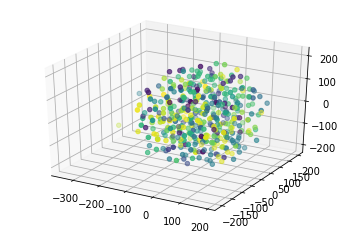

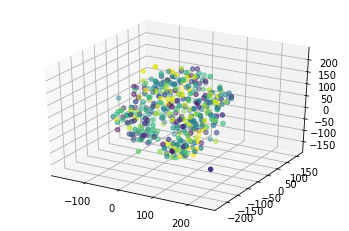

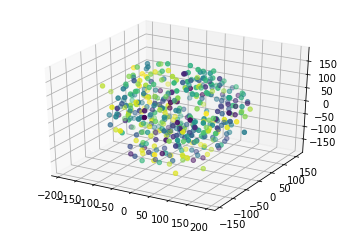

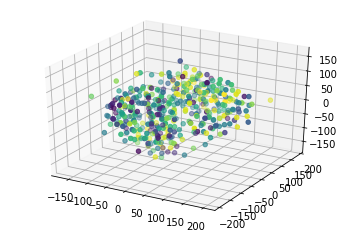

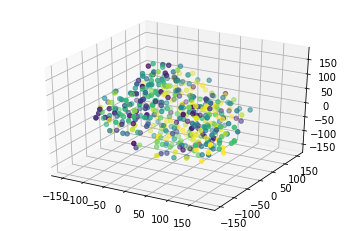

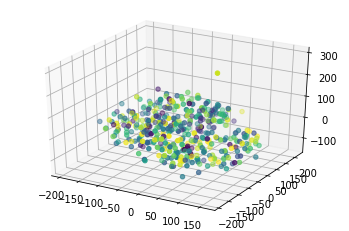

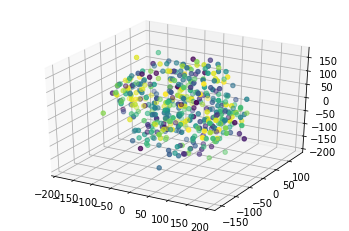

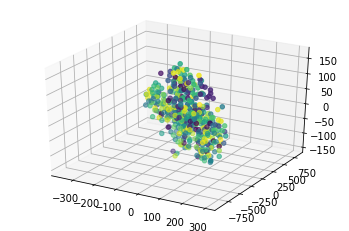

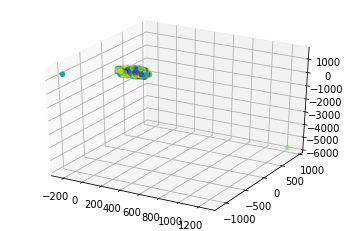

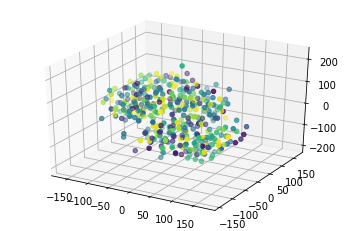

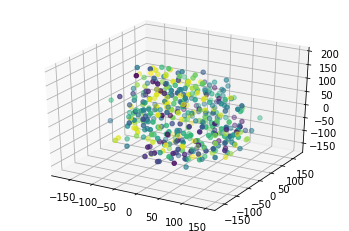

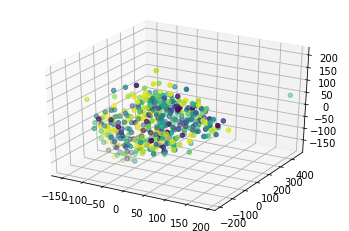

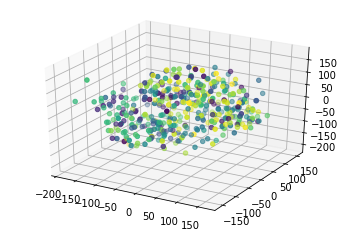

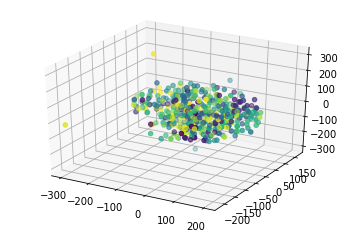

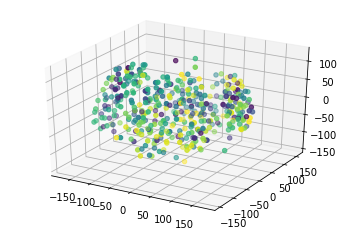

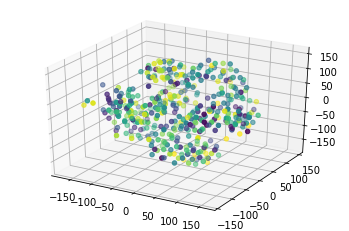

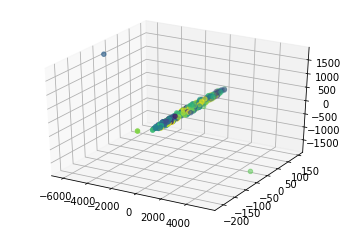

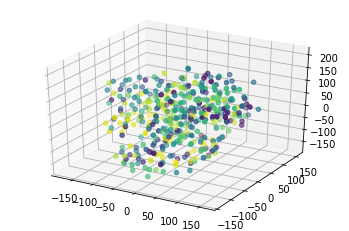

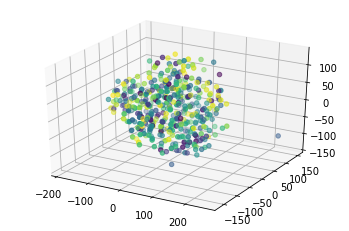

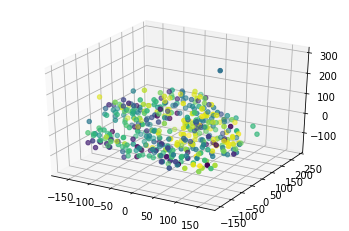

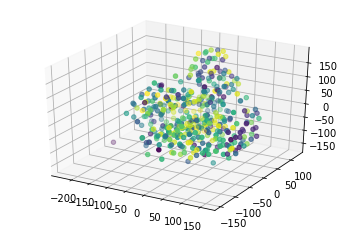

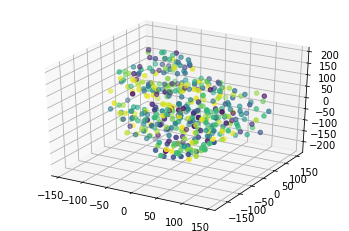

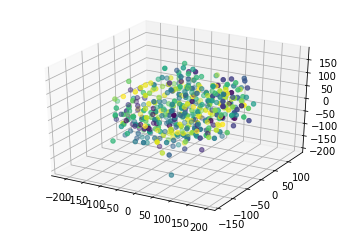

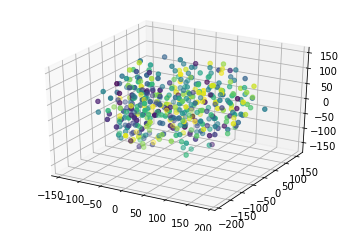

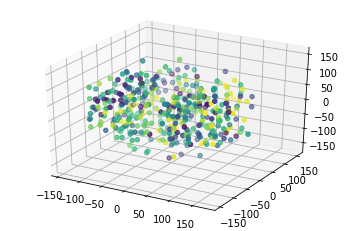

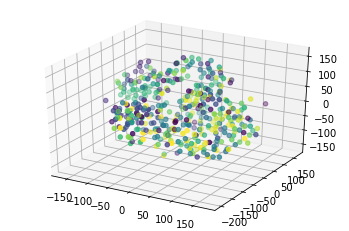

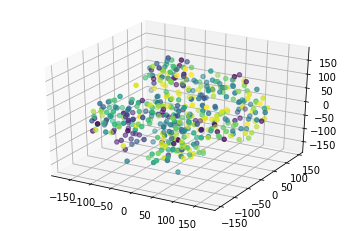

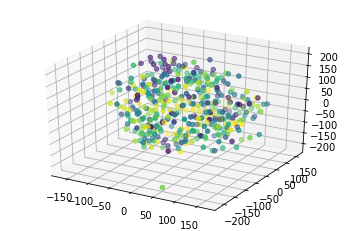

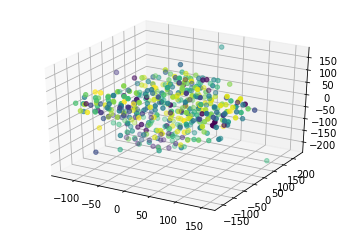

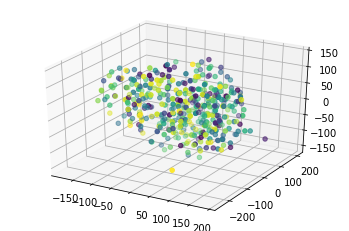

In [ ]:
model = UNET(in_channels=config[NUM_CHANNELS], out_channels=config[NUM_CLASSES]).to(config[DEVICE])
#With Logits because the model has not activation function

loss = nn.MSELoss()
#Optimizer
optimizer = optim.Adam(model.parameters(), lr=config[LEARNING_RATE])



#Check if we have to load a model
if config[LOAD_MODEL]:
  load_checkpoint(torch.load(config[SAVE_MODEL_FILENAME], map_location=config[DEVICE]), model)
  check_val(val_loader, model, loss, device=config[DEVICE])

#Training...
# Init wandb
run = wandb.init(project='Unet', entity='tecai', config=config, name=config[RUN_NAME])
metricsResults = getMetricsDict()
train(train_loader, model, optimizer, loss, metricsResults)
#Loader
# Finish wandb
run.finish()
